In [13]:
import scipy.io as sio
import numpy as np
from scipy.signal import savgol_filter as sgolay
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
M1_data = sio.loadmat('GoodM1neuron.mat')

# Hand x-position over time
hand_x = M1_data['hand_x']
# Hand y-position over time
hand_y = M1_data['hand_y']
# 
target_x = M1_data['targetX']
target_y = M1_data['targetY']
spike_times = M1_data['Chan'].real
start_times = M1_data['time_st_trial'].real
end_times = M1_data['time_endmv'].real
hit_times = M1_data['time_hit_target'].real
reward_times = M1_data['time_reward'].real

In [87]:
trial_num = 2

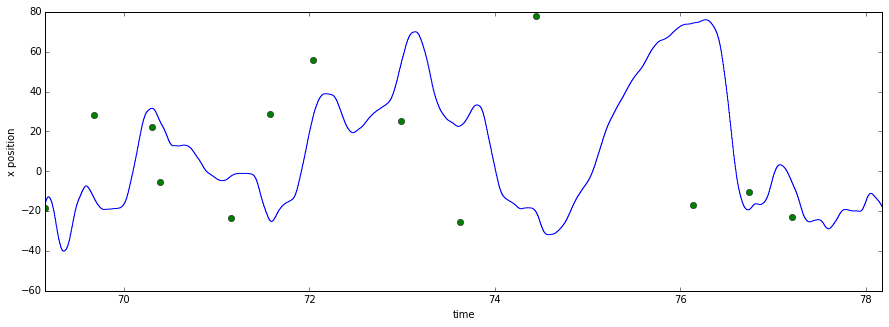

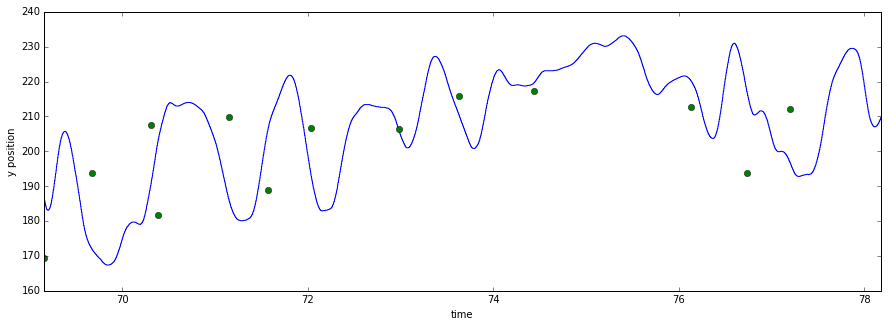

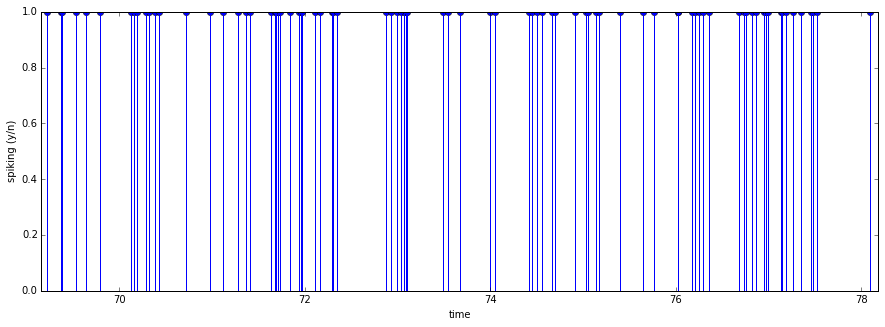

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.set_edgecolor(c)


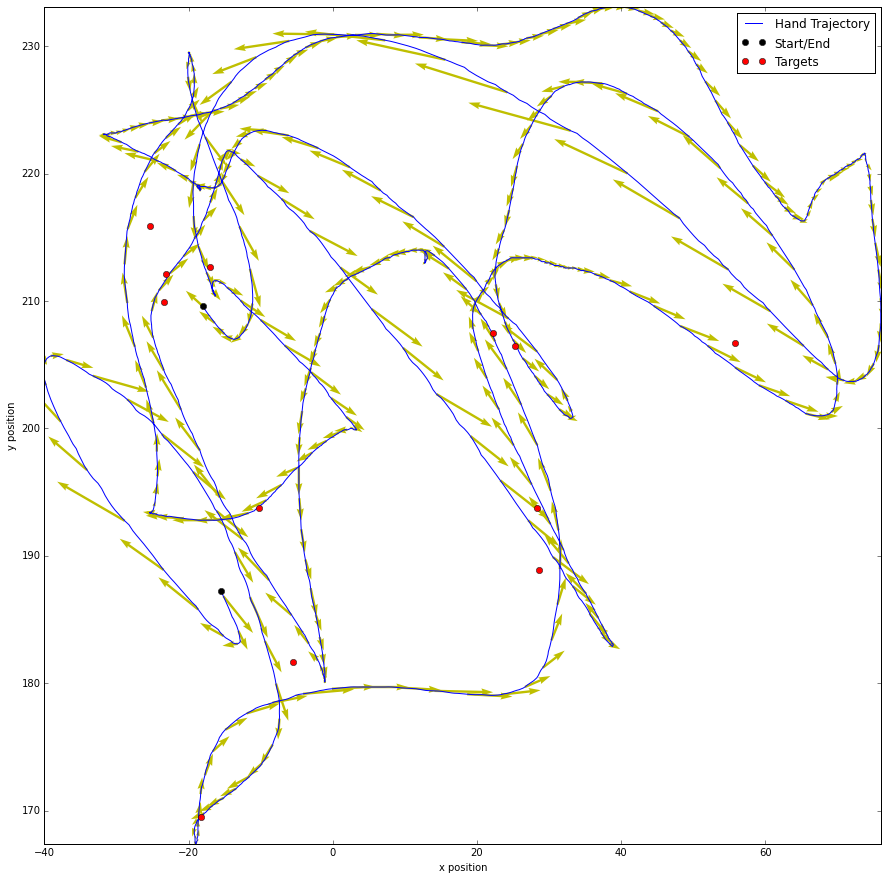

In [101]:
start = start_times[trial_num][0]
end = end_times[trial_num][0]

hand_ind = np.where((hand_x[:,0] >= start) & (hand_x[:,0] <= end))
hit_ind = np.where((hit_times > start) & (hit_times <= end))
hits = hit_times[hit_ind]
x = hand_x[hand_ind]
y = hand_y[hand_ind]
targets_x = target_x[hit_ind]
targets_y = target_y[hit_ind]

plt.figure(figsize=(15,5))
plt.plot(x[:,0],x[:,1])
plt.plot(hits,targets_x,'o')
plt.xlim([start,end])
plt.xlabel('time')
plt.ylabel('x position')

plt.figure(figsize=(15,5))
plt.plot(y[:,0],y[:,1])
plt.plot(hits,targets_y,'o')
plt.xlim([start,end])
plt.xlabel('time')
plt.ylabel('y position')

plt.figure(figsize=(15,5))
spikes = spike_times[(spike_times > start) & (spike_times < end)]
plt.stem(spikes,np.ones_like(spikes))
plt.xlim([start,end])
plt.xlabel('time')
plt.ylabel('spiking (y/n)')

plt.figure(figsize=(15,15))
xx = sgolay(x[:,1],window_length=9,polyorder=2)
yy = sgolay(y[:,1],window_length=9,polyorder=2)

res = 0.002
dx = np.diff(xx,n=1)
dx_beg = np.hstack((dx[0],dx))
dx_end = np.hstack((dx,dx[-1]))
dx = (dx_beg + dx_end)/2
dx = dx/res

dy = np.diff(yy,n=1)
dy_beg = np.hstack((dy[0],dy))
dy_end = np.hstack((dy,dy[-1]))
dy = (dy_beg + dy_end)/2
dy = dy/res

plt.plot(xx,yy,label='Hand Trajectory')
plt.plot(xx[0],yy[0],'ko',label='Start/End')
plt.plot(xx[-1],yy[-1],'ko')
plt.plot(targets_x,targets_y,'ro',label='Targets')
plt.xlim([np.min(xx),np.max(xx)])
plt.ylim([np.min(yy),np.max(yy)])
i = np.arange(1,xx.size,10)
plt.quiver(xx[i],yy[i],dx[i],dy[i],color='y');
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend();